In [ ]:
!pip install tgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

def load_dataset(benchmark, algo):
  real_data_orig=pd.read_csv(drive_location+algo+".csv")
  #print(real_data_orig)
  #real_data_selected_col = real_data_orig.drop(columns=['sys','sysname','arch','PS','executable'])
  if (benchmark == "SPEC2006" or benchmark == "SPEC2017"):
    real_data_selected_col=real_data_orig.drop(columns=['arch','ld_shared_by_cores','l2_shared_by_cores','no_of_threads','system_name','bus_speed_qpi','bus_speed_dmi','l1_ins_assoc','l1_data_assoc','l2_assoc','l3_assoc','raw_bus_speed','converted_bus_speed','ddr_type','runtime'])
  elif (benchmark == "NPB"):
    real_data_selected_col=real_data_orig.drop(columns=['sys','sysname','arch','l1d_assoc','l1d_cache_lines','l1d_shared_by_threads','l2_assoc','l2_cache_lines','l2_shared_by_threads','l3_assoc','l3_cache_lines','l3_shared_by_threads','PS','runtime','executable','system'])
  else:
    real_data_selected_col=real_data_orig.drop(columns=['sys','arch','l1d_assoc','l1d_cache_lines','l1d_shared_by_threads','l2_assoc','l2_cache_lines','l2_shared_by_threads','l3_assoc','l3_cache_lines','l3_shared_by_threads','runtime'])
  #print(real_data_selected_col)
  real_data_selected_col.dropna(inplace=True)
  #print(real_data_selected_col)
  return real_data_selected_col

In [ ]:
drive_location = r"/content/drive/My Drive/SITesting/"

benchmark = "SPEC2017"
algo = "603.bwaves_s"
algo_fname = "603.bwaves_s"

spec_float_benchmark_list = ["SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006"]
spec_float_algo_list = ["603.bwaves_s","607.cactuBSSN_s","619.lbm_s","621.wrf_s","627.cam4_s","628.pop2_s","638.imagick_s","644.nab_s","649.fotonik3d_s","654.roms_s","416.gamess","433.milc","434.zeusmp","435.gromacs","437.leslie3d","447.dealII","450.soplex","453.povray","454.calculix"]
spec_float_algo_fname_list = ["603.bwaves_s","607.cactuBSSN_s","619.lbm_s","621.wrf_s","627.cam4_s","628.pop2_s","638.imagick_s","644.nab_s","649.fotonik3d_s","654.roms_s","416.gamess","433.milc","434.zeusmp","435.gromacs","437.leslie3d","447.dealII","450.soplex","453.povray","454.calculix"]

spec_int_benchmark_list = ["SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006"]
spec_int_algo_list = ["600.perlbench_s","602.gcc_s","605.mcf_s","620.omnetpp_s","623.xalancbmk_s","625.x264_s","631.deepsjeng_s","641.leela_s","648.exchange2_s","657.xz_s","401.bzip2","456.hmmer","458.sjeng","462.libquantum","473.astar"]
spec_int_algo_fname_list = ["600.perlbench_s","602.gcc_s","605.mcf_s","620.omnetpp_s","623.xalancbmk_s","625.x264_s","631.deepsjeng_s","641.leela_s","648.exchange2_s","657.xz_s","401.bzip2","456.hmmer","458.sjeng","462.libquantum","473.astar"]

npb_other_benchmark_list = ["NPB","NPB","NPB","NPB","OTHER","OTHER","OTHER"]
npb_other_algo_list = ["npb_ep","npb_mg","npb_sp","npb_sp-mz","matmul","montecarlo","quicksort"]
npb_other_algo_fname_list = ["npb_ep","npb_mg","npb_sp","npb_sp-mz","matmul","montecarlo","quicksort"]


# Assign variable with which list is to be processed
benchmark_list = npb_other_benchmark_list
algo_list = npb_other_algo_list
algo_fname_list = npb_other_algo_fname_list
#for algo_idx, algo in enumerate(algo_list):

pd.set_option("display.max_columns", None)
# Load and preprocess real dataset
real_data = load_dataset(benchmark, algo)
real_data.to_csv(drive_location+algo+"_real_data_tgan.csv",index=False)


In [ ]:
for col in real_data:
    print(real_data[col].unique())

[2.7  2.1  2.5  3.   3.5  2.4  3.4  2.   2.6  3.2  2.2  2.3  3.8  3.7
 3.3  3.6  1.9  2.25 2.9  2.8  4.   3.9  3.1  2.35 2.45 2.95 2.65 2.75
 2.85 1.7  1.8 ]
['X86_64']
[32 64]
[1024  256  512]
[ 49152  77824  55296  38912  26624  45056  12288   8192  32768  61440
  22528  16384 262144  71680 131072 524288 393216 196608  65536  67584
 122880 116736 110592  98304  73728  36864  86016  24576 143360 155648
  53248 135168  90112  79872  30720   2048   6144   4096  35840  27648
  18432  15360  39936  43008 233472 311296 983040 112640]
[ 36  56  16  40  12  24  20  28  32   6   4  44  64  48   8 128  52  96
  80  76 112  72 104  88   2  10  18 168 224 384]
['PC4-2666V' 'PC4-2933Y' 'PC4-3200AA' 'PC4-2933V' '0' 'PC4-2400T']
[2666 2933 3200    0 2400]
[ 768  384  192   64  256  512 1024 1536 2048  176   96  128  320 2304
 3072   32 4096]


In [ ]:
print(real_data)

      cpu_clock     isa  l1_size  l2_size  l3_size  num-cpus   mem_type  \
0           2.7  X86_64       32     1024    49152        36  PC4-2666V   
1           2.1  X86_64       32     1024    77824        56  PC4-2666V   
2           2.5  X86_64       32     1024    77824        56  PC4-2666V   
3           3.0  X86_64       32     1024    49152        36  PC4-2666V   
4           2.7  X86_64       32     1024    49152        36  PC4-2666V   
...         ...     ...      ...      ...      ...       ...        ...   
1981        2.1  X86_64       32     1024    71680        52  PC4-2666V   
1982        2.1  X86_64       32     1024   155648       112  PC4-2666V   
1983        3.0  X86_64       32     1024    98304        72  PC4-2666V   
1984        2.5  X86_64       32     1024   155648       112  PC4-2666V   
1985        2.1  X86_64       32     1024   143360       104  PC4-2666V   

      mem_clock  mem_size  
0          2666       768  
1          2666       768  
2          2666

In [ ]:
continuous_columns=[]

In [ ]:
from tgan.model import TGANModel
tgan = TGANModel(continuous_columns,max_epoch=10,steps_per_epoch=10000)

In [ ]:
tgan.fit(real_data)




[0627 17:44:08 @input_source.py:222] Setting up the queue 'QueueInput/input_queue' for CPU prefetching ...








Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[0627 17:44:08 @registry.py:126] gen/LSTM/00/FC input: [200, 100]

Instructions for updating:
Please use `layer.__call__` method instead.
[0627 17:44:08 @registry.py:134] gen/LSTM/00/FC output: [200, 100]
[0627 17:44:08 @registry.py:126] gen/LSTM/00/FC2 input: [200, 100]
[0627 17:44:08 @registry.py:134] gen/LSTM/00/FC2 output: [200, 31]
[0627 17:44:08 @registry.py:126] gen/LSTM/00/FC3 input: [200, 31]
[0627 17:44:08 @registry.py:134] gen/LSTM/00/FC3 output: [200, 100]
[0627 17:44:09 @registry.py:126] gen/LSTM/01/FC input: [200, 100]
[0627 17:44:09 @registr

In [ ]:
sample=tgan.sample(1000)
sample.to_csv(drive_location+algo+"_generated_data_tgan.csv",index=False)

  2%|2         |4/200[00:00<00:35, 5.46it/s]


In [ ]:
tgan.save(drive_location+"model/tgan.pkl",force=True)

[0627 17:45:43 @model.py:813] Model saved successfully.


In [ ]:
# new=TGANModel.load(drive_location+"model/tgan.pkl")
# new_sample=new.sample(1000)

In [ ]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


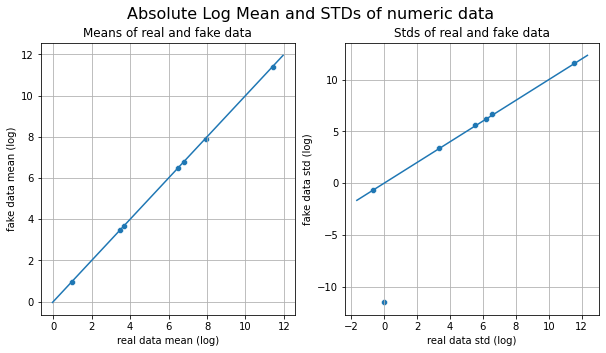

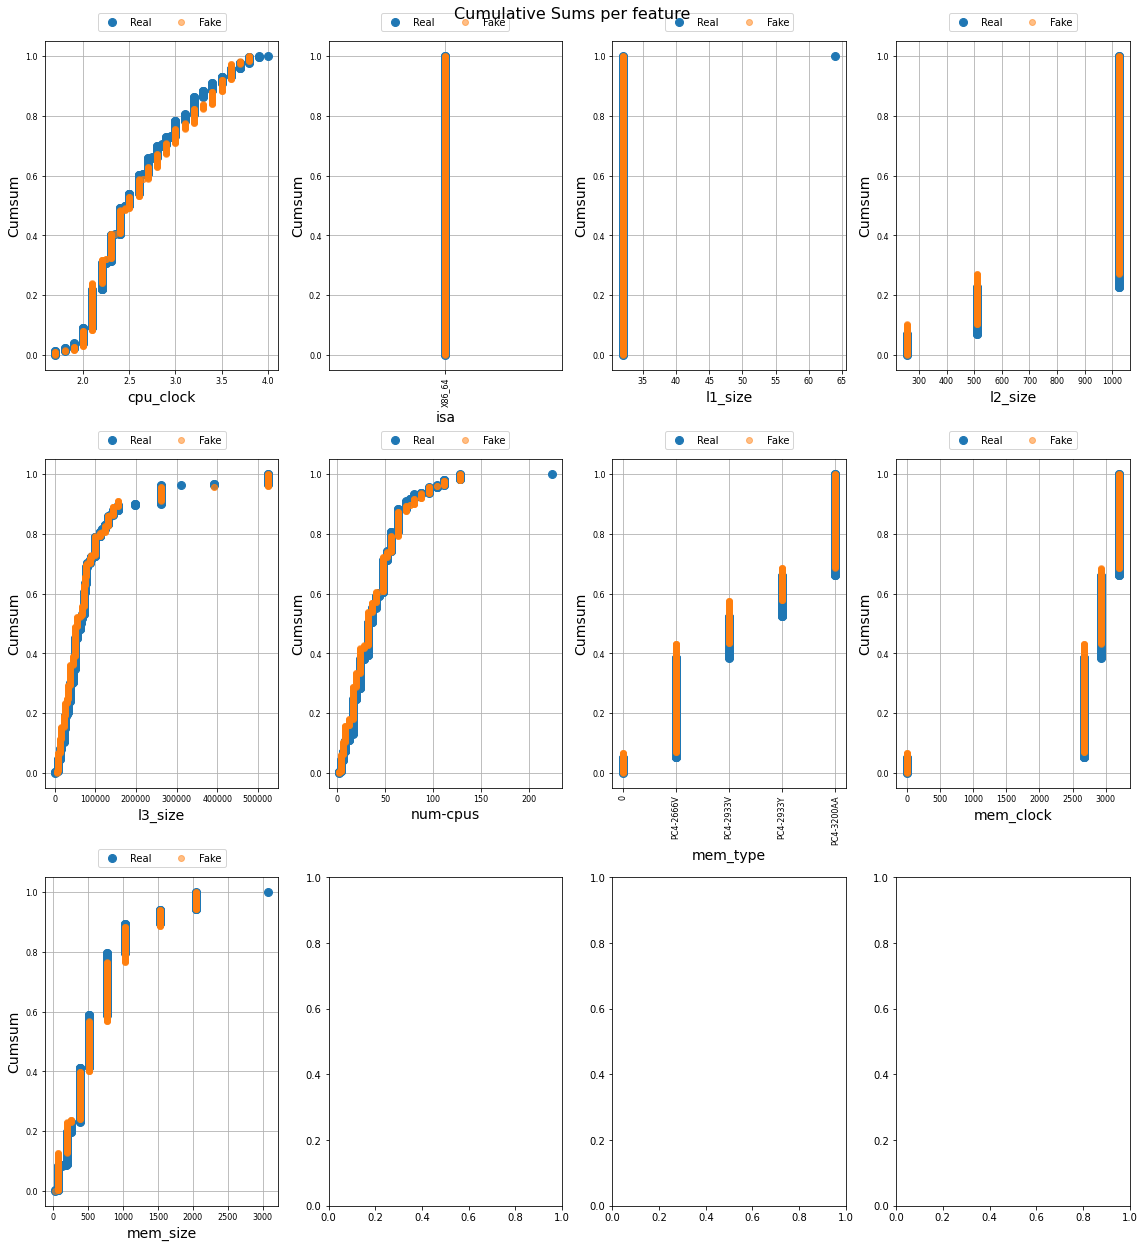

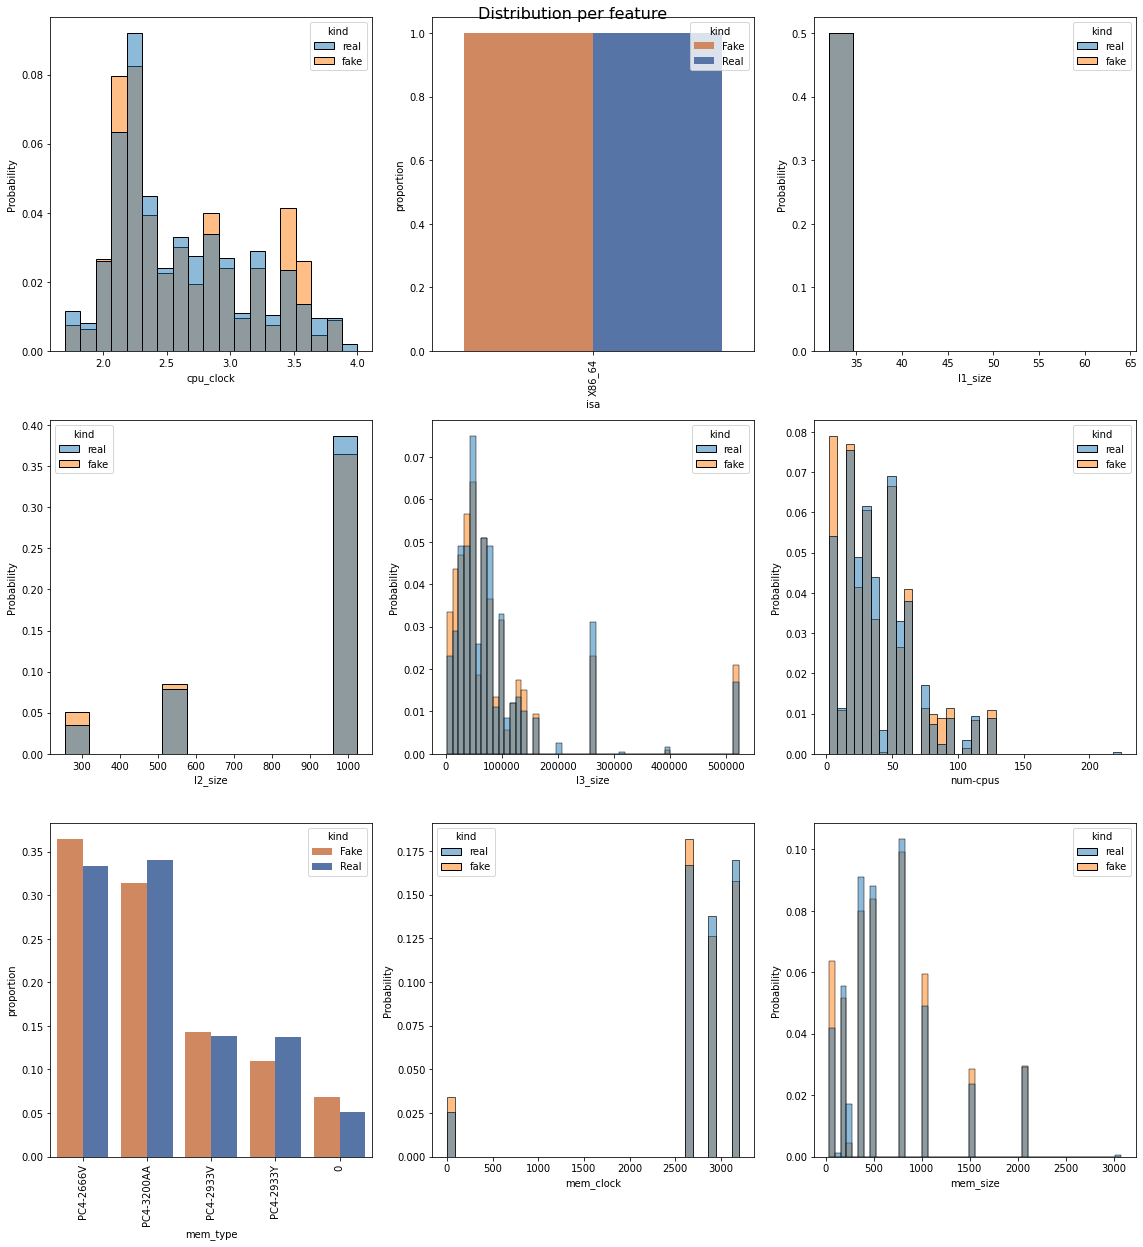

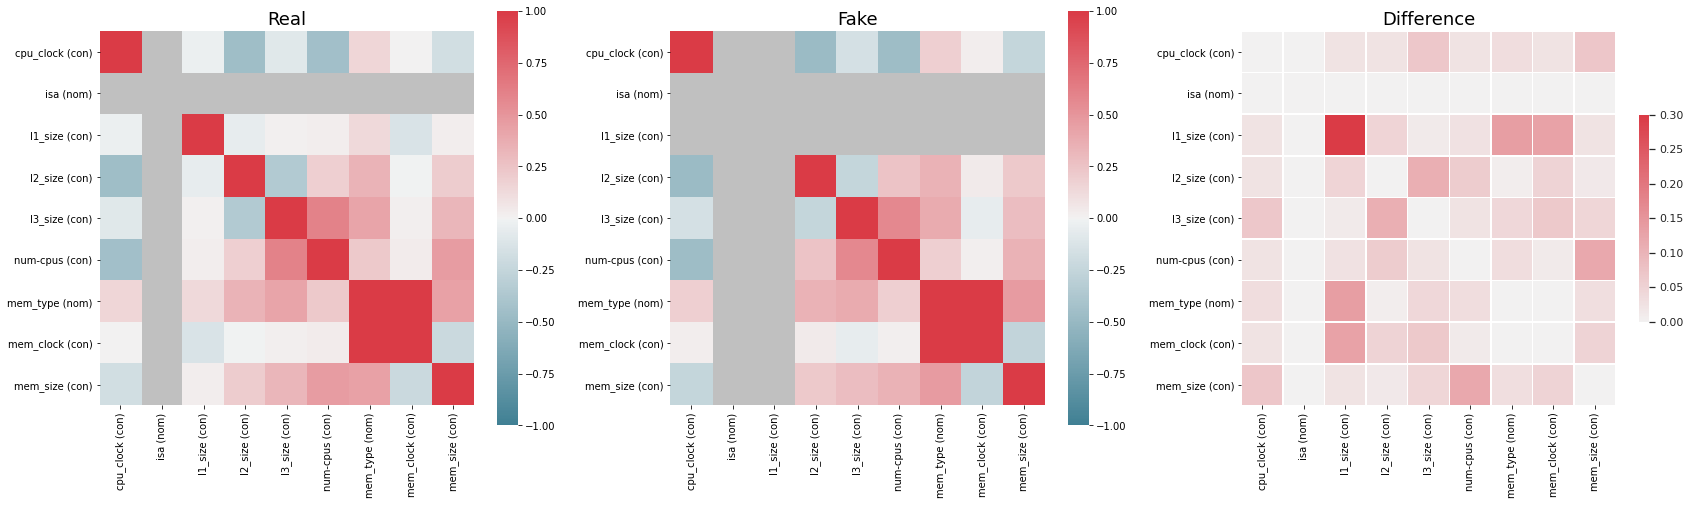

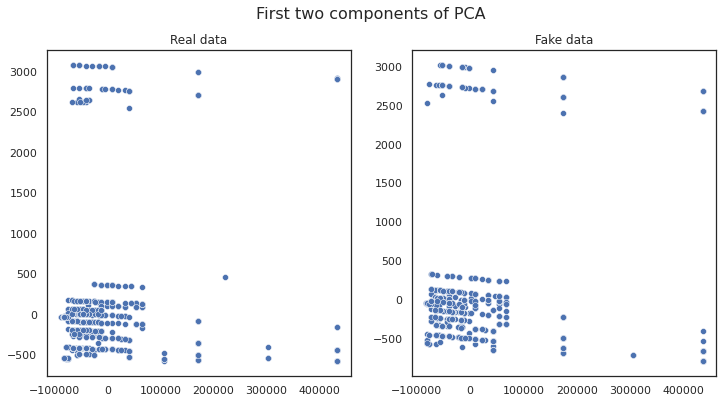

In [ ]:
import pandas as pd
from table_evaluator import load_data, TableEvaluator


new_data=pd.read_csv(drive_location+algo+"_generated_data_tgan.csv")
real_data.columns=sample.columns.values
table_evaluator =  TableEvaluator(real_data, new_data)

table_evaluator.visual_evaluation()